In [1]:
# Import Dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func, and_
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
session = Session(bind=engine)
Base.classes.keys()

['measurements', 'stations']

In [4]:
# Assign the measurements class to a variable called `Measurements` ans stations class to variable name `Stations`
Measurements = Base.classes.measurements
Stations = Base.classes.stations

## Precipitation Analysis


In [5]:
#get distinct months in each year. use group by year and month in descending order
records = session.query(Measurements.date).group_by(func.strftime('%Y-%m', Measurements.date))\
        .order_by(Measurements.date.desc()).all()
# first record of list is start date and 12th record is the 12th month data
start_date = records[0]
end_date = records[12]

#use end date to select all data whose date is after the end date
prcp_records = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= end_date[0]).all()
prcp_records

[('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 0.0),
 ('2016-10-09', 0.0),
 ('2016-10-10', 0.0),
 ('2016-10-11', 0.0),
 ('2016-10-12', 0.0),
 ('2016-10-13', 0.0),
 ('2016-10-14', 0.0),
 ('2016-10-15', 0.0),
 ('2016-10-16', 0.0

In [6]:
# save the list of tuples to a dataframe and set index as date
prcptn_df = pd.DataFrame.from_records(prcp_records)
prcptn_df = prcptn_df.rename(columns={0: 'Date', 1: 'Prcp'})
prcptn_df_12_mnts =prcptn_df.set_index('Date')
prcptn_df_12_mnts.head()

,Prcp
Date,
2016-08-31,0.13
2016-09-01,0.00
2016-09-02,0.00
2016-09-03,0.00
2016-09-04,0.03


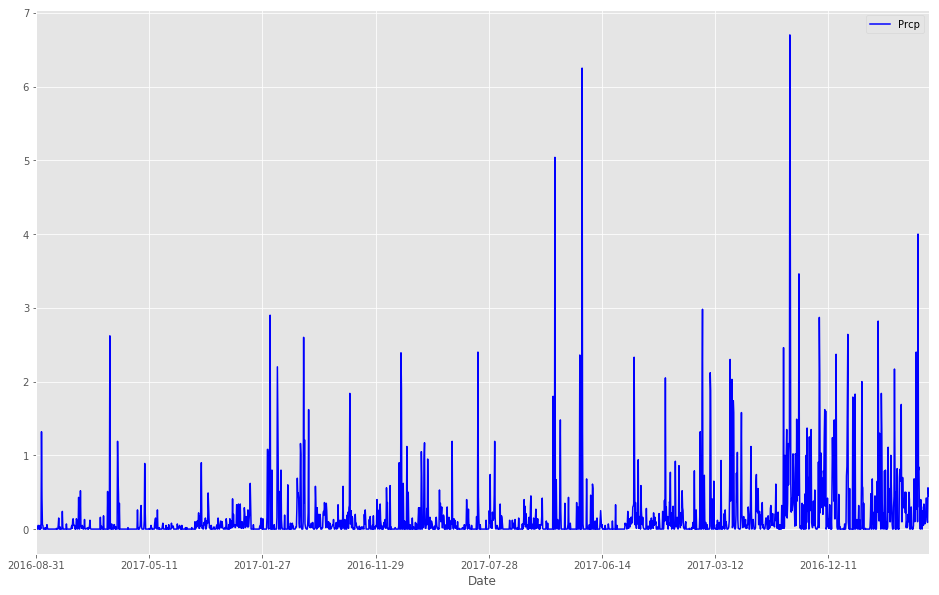

In [7]:
# create a plot
plt.style.use('ggplot')
prcptn_df_12_mnts.plot(figsize=(16,10), color="b")
plt.show()

## Station Analysis

In [8]:
# query to get total number of stations
num_stations = session.query(func.count(Stations.id)).scalar()
num_stations

9

In [9]:
#query to get list of stations
list_stations = session.query(Stations.name).all()
list_stations = [station[0] for station in list_stations]
list_stations

['WAIKIKI 717.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'WAIHEE 837.5, HI US',
 'HONOLULU OBSERVATORY 702.2, HI US',
 'MANOA LYON ARBO 785.2, HI US']

In [10]:
# get most active station. the station with highest number of observations is the most active station
stations_tobs = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by\
(func.count(Measurements.tobs).desc()).all()
most_active_station = stations_tobs[0].station
most_active_station

'USC00519281'

In [11]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
tobs_records = session.query(Measurements.station ,Measurements.date, Measurements.tobs).\
                filter(and_(Measurements.station == most_active_station, Measurements.date >= end_date[0]))\
                .order_by(Measurements.date.desc()).all()
tobs_records

[('USC00519281', '2017-08-18', 79),
 ('USC00519281', '2017-08-17', 76),
 ('USC00519281', '2017-08-16', 76),
 ('USC00519281', '2017-08-15', 77),
 ('USC00519281', '2017-08-14', 77),
 ('USC00519281', '2017-08-13', 77),
 ('USC00519281', '2017-08-06', 83),
 ('USC00519281', '2017-08-05', 82),
 ('USC00519281', '2017-08-04', 77),
 ('USC00519281', '2017-07-31', 76),
 ('USC00519281', '2017-07-30', 81),
 ('USC00519281', '2017-07-29', 82),
 ('USC00519281', '2017-07-28', 81),
 ('USC00519281', '2017-07-27', 76),
 ('USC00519281', '2017-07-26', 75),
 ('USC00519281', '2017-07-25', 77),
 ('USC00519281', '2017-07-24', 75),
 ('USC00519281', '2017-07-23', 82),
 ('USC00519281', '2017-07-22', 77),
 ('USC00519281', '2017-07-21', 77),
 ('USC00519281', '2017-07-20', 77),
 ('USC00519281', '2017-07-19', 76),
 ('USC00519281', '2017-07-18', 76),
 ('USC00519281', '2017-07-17', 76),
 ('USC00519281', '2017-07-16', 80),
 ('USC00519281', '2017-07-15', 80),
 ('USC00519281', '2017-07-14', 76),
 ('USC00519281', '2017-07-13

In [12]:
# save the list of tuples to a dataframe 
tobs_df = pd.DataFrame.from_records(tobs_records)
tobs_df = tobs_df.rename(columns={0: 'Station', 1: 'Date', 2:'Temp Observations'})
tobs_df.head()

,Station,Date,Temp Observations
0,USC00519281,2017-08-18,79
1,USC00519281,2017-08-17,76
2,USC00519281,2017-08-16,76
3,USC00519281,2017-08-15,77
4,USC00519281,2017-08-14,77


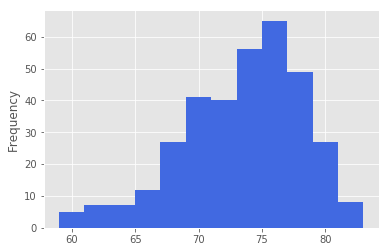

In [13]:
tobs_df.hist(bins=12, color="royalblue")
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("")
plt.show()

## Temperature Analysis

In [14]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
                filter(Measurements.date.between(start_date, end_date))\
                .all()
    

In [15]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year 
temps = calc_temps("2017-02-23", "2017-02-28")
temps_df = pd.DataFrame.from_records(temps)
temps_df = temps_df.rename(columns={0: 'Min', 1: 'Max', 2:'Avg'})
temps_df

,Min,Max,Avg
0,61,77,69.411765


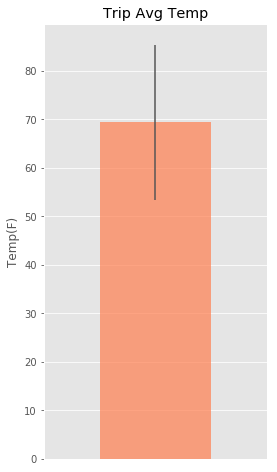

In [16]:
#plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

mean = temps_df['Avg']
errors = temps_df['Max'] - temps_df['Min']
fig, ax = plt.subplots()

mean.plot.bar(yerr=errors, ax=ax, width=0.5, figsize=(4,8), color="coral", alpha=0.7)
plt.xlabel("")
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
plt.xticks([])
plt.savefig
plt.show()

In [17]:
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
def calc_temp(start_date):
    results = session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
                filter(Measurements.date>=str(start_date)).all()

    temperature_list = list(np.ravel(results))
    return temperature_list

In [18]:
calc_temp('2017-02-23')

[58.0, 87.0, 75.393188854489168]